In [ ]:
# Import required libraries
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 5 years

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

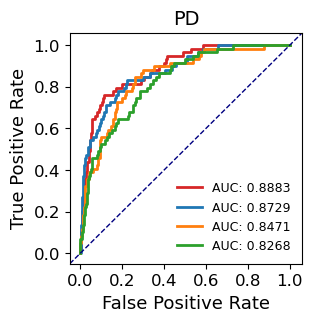

In [ ]:
# Define Training and ROC Calculation Function
def train_and_get_roc(data_path, feature_range, params):
    data = pd.read_csv(data_path)
    data['start_time'] = pd.to_datetime(data['start_time'])
    data['end_time'] = pd.to_datetime(data['end_time'])
    data['time_diff'] = (data['end_time'] - data['start_time']).dt.days / 365.25
    data = data[data['time_diff'] <= 5]

    X = data.iloc[:, feature_range]
    y = data['event']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=1000)
    y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Define file path and model configurations
file_path = '../../data/3.PD/AR+ST+ET+event+Prot+Met+Pop.csv'

# List of model configurations
models_params = [
    ([3, 309], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.01, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 308], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.05, 'feature_fraction': 0.5, 'bagging_fraction': 0.5, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 303], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 2, 'learning_rate': 0.4, 'feature_fraction': 0.4, 'bagging_fraction': 0.4, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 301], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 3, 'learning_rate': 0.6, 'feature_fraction': 0.4, 'bagging_fraction': 0.5, 'bagging_freq': 5, 'verbose': 0})
]

# Visualization settings
colors = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Initialize figure with square aspect ratio
plt.figure(figsize=(3, 3))

# Train each model and plot its ROC curve
for i, (feature_range, params) in enumerate(models_params):
    fpr, tpr, roc_auc = train_and_get_roc(file_path, slice(*feature_range), params)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'AUC: {roc_auc:.4f}')

# Add diagonal reference line
plt.plot([-0.05, 1.06], [-0.05, 1.06], color='navy', lw=1, linestyle='--')

# Set axis limits with small buffer
plt.xlim([-0.05, 1.06])
plt.xticks(np.arange(0, 1.01, 0.2))
plt.ylim([-0.05, 1.06])
plt.yticks(np.arange(0, 1.01, 0.2))

# Adjust tick label size
plt.tick_params(axis='both', labelsize=12)

# Add axis labels and title
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('PD', fontsize=14)

# Add legend (bottom right, no frame)
plt.legend(loc="lower right", frameon=False, fontsize=9)

# Remove grid lines for cleaner look
plt.grid(False)

# Display the plot
plt.show()

# 10 years

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

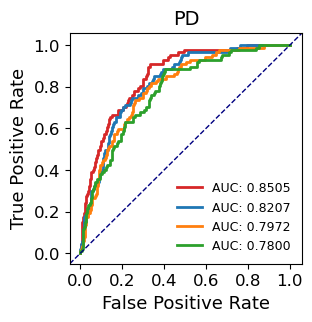

In [ ]:
# Define Training and ROC Calculation Function
def train_and_get_roc(data_path, feature_range, params):
    data = pd.read_csv(data_path)
    data['start_time'] = pd.to_datetime(data['start_time'])
    data['end_time'] = pd.to_datetime(data['end_time'])
    data['time_diff'] = (data['end_time'] - data['start_time']).dt.days / 365.25
    data = data[data['time_diff'] <= 10]

    X = data.iloc[:, feature_range]
    y = data['event']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=1000)
    y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Define file path and model configurations
file_path = '../../data/3.PD/AR+ST+ET+event+Prot+Met+Pop.csv'

# List of model configurations
models_params = [
    ([3, 309], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.01, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 308], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.2, 'feature_fraction': 0.5, 'bagging_fraction': 0.5, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 303], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 5, 'learning_rate': 0.2, 'feature_fraction': 0.4, 'bagging_fraction': 0.4, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 301], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.25, 'feature_fraction': 0.4, 'bagging_fraction': 0.4, 'bagging_freq': 4, 'verbose': 0})
]

# Visualization settings
colors = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Initialize figure with square aspect ratio
plt.figure(figsize=(3, 3))

# Train each model and plot its ROC curve
for i, (feature_range, params) in enumerate(models_params):
    fpr, tpr, roc_auc = train_and_get_roc(file_path, slice(*feature_range), params)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'AUC: {roc_auc:.4f}')

# Add diagonal reference line
plt.plot([-0.05, 1.06], [-0.05, 1.06], color='navy', lw=1, linestyle='--')

# Set axis limits with small buffer
plt.xlim([-0.05, 1.06])
plt.xticks(np.arange(0, 1.01, 0.2))
plt.ylim([-0.05, 1.06])
plt.yticks(np.arange(0, 1.01, 0.2))

# Adjust tick label size
plt.tick_params(axis='both', labelsize=12)

# Add axis labels and title
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('PD', fontsize=14)

# Add legend (bottom right, no frame)
plt.legend(loc="lower right", frameon=False, fontsize=9)

# Remove grid lines for cleaner look
plt.grid(False)

# Display the plot
plt.show()

# 15 years

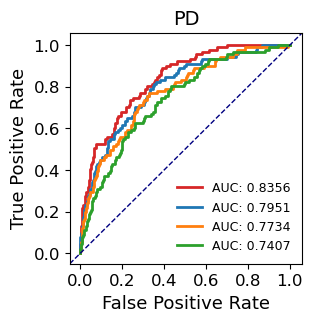

In [ ]:
# Define Training and ROC Calculation Function
def train_and_get_roc(data_path, feature_range, params):
    data = pd.read_csv(data_path)
    data['start_time'] = pd.to_datetime(data['start_time'])
    data['end_time'] = pd.to_datetime(data['end_time'])
    data['time_diff'] = (data['end_time'] - data['start_time']).dt.days / 365.25
    data = data[data['time_diff'] <= 15]

    X = data.iloc[:, feature_range]
    y = data['event']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=1000)
    y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Define file path and model configurations
file_path = '../../data/3.PD/AR+ST+ET+event+Prot+Met+Pop.csv'

# List of model configurations
models_params = [
    ([3, 309], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.01, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 308], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 15, 'learning_rate': 0.1, 'feature_fraction': 0.5, 'bagging_fraction': 0.5, 'bagging_freq': 5, 'verbose': 0}),
    ([3, 303], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 2, 'learning_rate': 0.5, 'feature_fraction': 0.5, 'bagging_fraction': 0.5, 'bagging_freq': 4, 'verbose': 0}),
    ([3, 301], {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 2, 'learning_rate': 0.2, 'feature_fraction': 0.2, 'bagging_fraction': 0.2, 'bagging_freq': 9, 'verbose': 0})
]

# Visualization settings
colors = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Initialize figure with square aspect ratio
plt.figure(figsize=(3, 3))

# Train each model and plot its ROC curve
for i, (feature_range, params) in enumerate(models_params):
    fpr, tpr, roc_auc = train_and_get_roc(file_path, slice(*feature_range), params)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'AUC: {roc_auc:.4f}')

# Add diagonal reference line (random classifier)
plt.plot([-0.05, 1.06], [-0.05, 1.06], color='navy', lw=1, linestyle='--')

# Set axis limits with small buffer
plt.xlim([-0.05, 1.06])
plt.xticks(np.arange(0, 1.01, 0.2))
plt.ylim([-0.05, 1.06])
plt.yticks(np.arange(0, 1.01, 0.2))

# Adjust tick label size
plt.tick_params(axis='both', labelsize=12)

# Add axis labels and title
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('PD', fontsize=14)

# Add legend (bottom right, no frame)
plt.legend(loc="lower right", frameon=False, fontsize=9)

# Remove grid lines for cleaner look
plt.grid(False)

# Display the plot
plt.show()